# Cardiovascular Disease Analysis

---

### Questions and Answers
- **Q: What's the relationship between smoking and cardiovascular disease?**
- A: There doesn't seem to be much of a relationship between smoking and cardiovascular disease as smokers and non-smokers are similar in the amount of people with the disease and not. Furthermore, more males tend to smoke than females despite more males being in this study.
- **Q: What's the relationship between cardiovascular disease and blood pressure?**
- A: More people who have cardiovascular disease tend to have higher blood pressure than those without.
- **Q: What's the relationship between age and blood pressure?**
- A: There is too much of a relationship between age and blood pressure as the correlation is 0.2 which is a weak positive correlation.

In [2]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read data
df = pd.read_csv("cardio_train.csv",sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

In [5]:
# Convert age from days to years
df['age'] = (pd.to_timedelta(df['age'], unit='D') / pd.Timedelta(days=365)).apply(np.floor)
df['age'] = df['age'].astype(int)

In [6]:
# Convert categorical variables to string
df[['id','gender','cholesterol','gluc','smoke','alco','active','cardio']] = df[['id','gender','cholesterol','gluc','smoke','alco','active','cardio']].astype(str)

# Include male and female in gender column
df['gender'] = df['gender'].replace({'1': 'Female', '2': 'Male'})

# Convert cholesterol and glucose levels to list how normal they are
df[['cholesterol','gluc']] = df[['cholesterol','gluc']].replace({'1': 'Normal', '2': 'Above Normal', '3': 'Well Above Normal'})

# Convert binary variables to yes and no
df[['smoke','alco','active','cardio']] = df[['smoke','alco','active','cardio']].replace({'0': 'No', '1': 'Yes'})

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,No
1,1,55,Female,156,85.0,140,90,Well Above Normal,Normal,No,No,Yes,Yes
2,2,51,Female,165,64.0,130,70,Well Above Normal,Normal,No,No,No,Yes
3,3,48,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes
4,4,47,Female,156,56.0,100,60,Normal,Normal,No,No,No,No


**Male and Female Pie Charts**

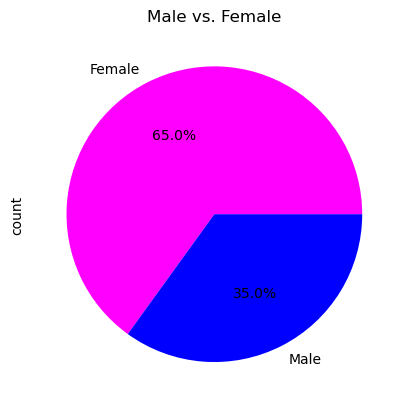

In [8]:
# Pie chart to show the distribution in genders

# Get the unique genders of the people
unique_gender = df['gender'].value_counts()
unique_gender = unique_gender.rename('count')

# Make the pie chart
plt.pie(unique_gender, labels=unique_gender.keys(), autopct='%1.1f%%',colors=["magenta", "blue"])
plt.title('Male vs. Female')
plt.ylabel('count')
plt.show()

In [9]:
# Filter out smokers and non-smokers
df_smoke = df[df['smoke'] == 'Yes']
df_no_smoke = df[df['smoke'] == 'No']

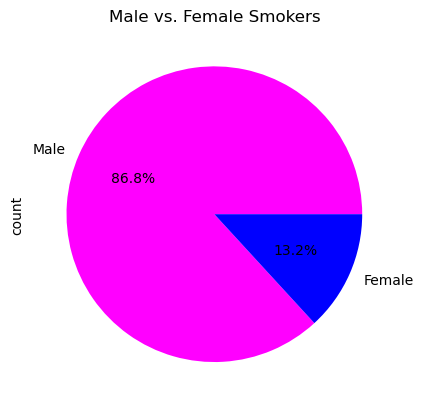

In [10]:
# Pie chart to show the distribution in genders

# Get the unique genders of the people
unique_gender = df_smoke['gender'].value_counts()
unique_gender = unique_gender.rename('count')

# Make the pie chart
plt.pie(unique_gender, labels=unique_gender.keys(), autopct='%1.1f%%',colors=["magenta", "blue"])
plt.title('Male vs. Female Smokers')
plt.ylabel('count')
plt.show()

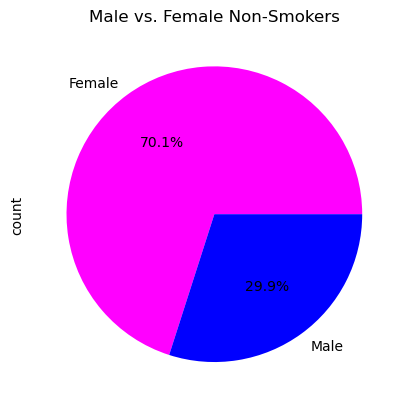

In [11]:
# Pie chart to show the distribution in genders

# Get the unique genders of the people
unique_gender = df_no_smoke['gender'].value_counts()
unique_gender = unique_gender.rename('count')

# Make the pie chart
plt.pie(unique_gender, labels=unique_gender.keys(), autopct='%1.1f%%',colors=["magenta", "blue"])
plt.title('Male vs. Female Non-Smokers')
plt.ylabel('count')
plt.show()

### Bar Charts related to smokers and non-smokers having Cardiovascular Disease

In [13]:
df_smoke_plot = df_smoke.groupby(['gender', 'cardio']).size().reset_index().pivot(columns='gender', index='cardio', values=0)

<Axes: title={'center': 'Smokers and Cardiovascular Disease'}, xlabel='cardio'>

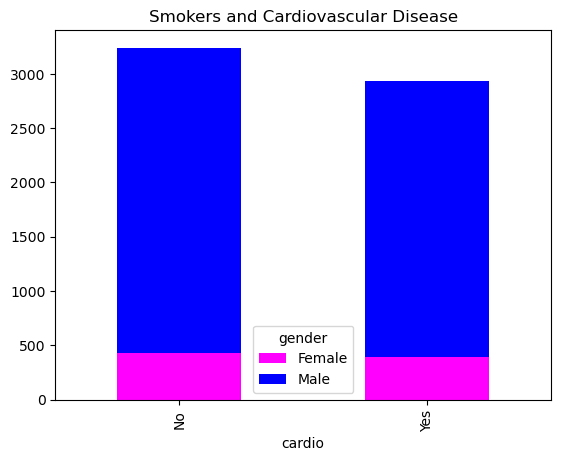

In [14]:
df_smoke_plot.plot(kind='bar', stacked=True, color=['magenta','blue'],title="Smokers and Cardiovascular Disease")

In [15]:
df_no_smoke_plot = df_no_smoke.groupby(['gender', 'cardio']).size().reset_index().pivot(columns='gender', index='cardio', values=0)

<Axes: title={'center': 'Non-Smokers and Cardiovascular Disease'}, xlabel='cardio'>

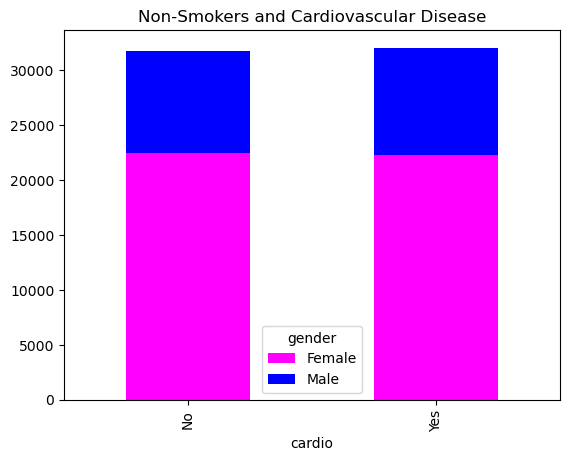

In [16]:
df_no_smoke_plot.plot(kind='bar', stacked=True, color=['magenta','blue'], title="Non-Smokers and Cardiovascular Disease")

**Systolic Blood Pressure Summary Statistics**

In [18]:
df["ap_hi"].describe()

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [19]:
#Filter out outliers
q_low = df["ap_hi"].quantile(0.01)
q_hi  = df["ap_hi"].quantile(0.99)

df_filtered_bloodpressure = df[(df["ap_hi"] < q_hi) & (df["ap_hi"] > q_low)]

In [20]:
df_filtered_bloodpressure.shape

(67633, 13)

In [21]:
df_filtered_bloodpressure["ap_hi"].describe()

count    67633.000000
mean       126.741842
std         14.924742
min         93.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        179.000000
Name: ap_hi, dtype: float64

**Boxplot of Systolic Blood Pressure**

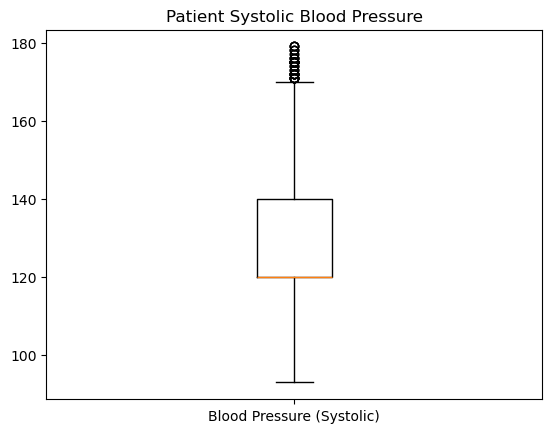

In [23]:
plt.boxplot(df_filtered_bloodpressure["ap_hi"])
plt.title("Patient Systolic Blood Pressure")
plt.xticks([1],["Blood Pressure (Systolic)"])
plt.show()

### Boxplots related to Systolic Blood Pressure in patients with and without Cardiovascular Disease

[Text(0.5, 1.0, 'Patient Systolic Blood Pressure Grouped by Cardiovascular Disease Presence'),
 Text(0, 0.5, 'Blood Pressure (Systolic)')]

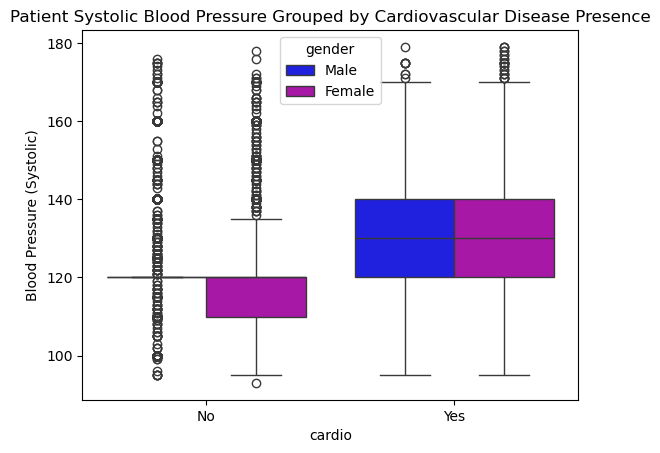

In [25]:
sns.boxplot(x="cardio", y="ap_hi",
            hue="gender", palette=["b", "m"],
            data=df_filtered_bloodpressure).set(title="Patient Systolic Blood Pressure Grouped by Cardiovascular Disease Presence"
                                                ,ylabel="Blood Pressure (Systolic)")

### Age vs. Blood Pressure (Systolic) Scatterplot and Regression

Text(0, 0.5, 'Blood Pressure (Systolic)')

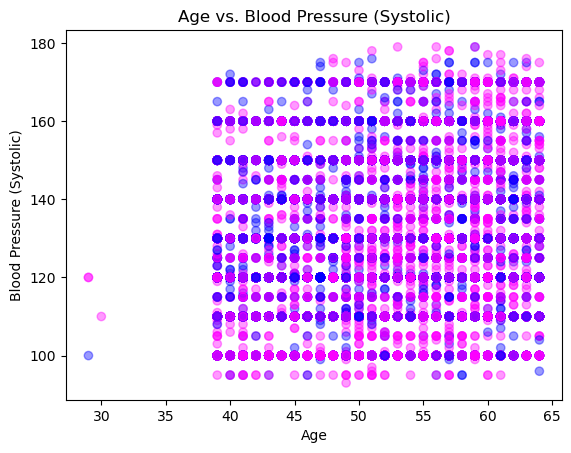

In [27]:
colors = {'Male': 'blue', 'Female': 'magenta'}
color_list = [colors[group] for group in df_filtered_bloodpressure['gender']]

plt.scatter(df_filtered_bloodpressure['age'],df_filtered_bloodpressure['ap_hi'],c=color_list,alpha=0.4)
plt.title("Age vs. Blood Pressure (Systolic)")
plt.xlabel("Age")
plt.ylabel("Blood Pressure (Systolic)")

The correlation between age and blood pressure is 0.2


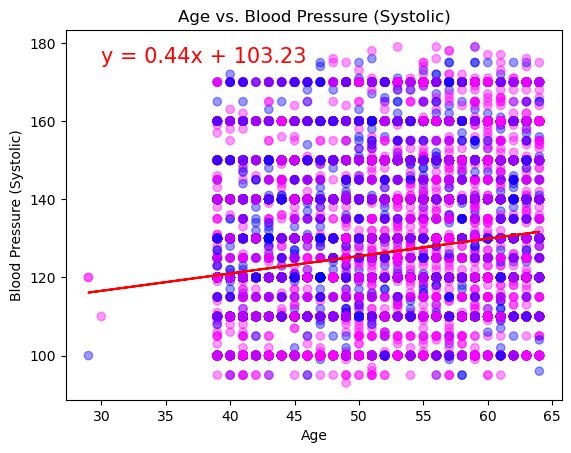

In [28]:
x_values = df_filtered_bloodpressure['age']
y_values = df_filtered_bloodpressure['ap_hi']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The correlation between age and blood pressure is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.scatter(x_values,y_values,c=color_list,alpha=0.4)
plt.plot(x_values,regress_values,"r-")
plt.title("Age vs. Blood Pressure (Systolic)")
plt.xlabel("Age")
plt.ylabel("Blood Pressure (Systolic)")
plt.annotate(line_eq,(30,175),fontsize=15,color="red")
plt.show()